# PYTHON SPRINT1 PROJECT -    DIWALI_SALES_ANALYSIS

In [4]:
#Import necessary libraries using alias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the CSV file into a DataFrame
# Use 'unicode_escape' encoding to handle any special characters in the file
# Assuming the file "Diwali Sales Data.csv" contains data related to Diwali sales

df = pd.read_csv("Sales_Data.csv", encoding= 'unicode_escape')

In [6]:
# Display the first 10 rows of the DataFrame. This provides a preview of the data to check if it was loaded correctly.

df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [7]:
#To know the total number of rows and columns in dataset we use .shape

df.shape

(11251, 15)

## **Inference :** 

**Dataset comprises 11251 rows and 15 columns.**

In [8]:
# Display basic information like the columns name and their corresponding data types along with finding if they contain null values or not. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## **Inference :**

**Status and unnamed1 columns are blank and Amount column has some null values.**

In [9]:
# Drop specified columns from the DataFrame
# 'axis=1' specifies that columns should be dropped, and 'inplace=True' makes the change permanent in the original DataFrame

df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


## **Inference :**

**Status and unnamed1 columns dropped out but still amount column has null values**



In [11]:
# Replace values in the 'Marital_Status' column

df['Marital_Status'].replace({0: 'Married', 1: 'Unmarried'}, inplace=True)

In [12]:
# Display the last few rows of the DataFrame using the tail() method. This provides a quick preview of the end of the DataFrame

df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11246,1000695,Manning,P00296942,M,18-25,19,Unmarried,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Married,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Married,Karnataka,Southern,Agriculture,Office,3,206.0
11250,1002744,Brumley,P00281742,F,18-25,19,Married,Maharashtra,Western,Healthcare,Office,3,188.0


In [13]:
#Use isnull() to identify missing values in the DataFrame   
# use .sum() to sum the True values along each column

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

## **Inference :**

  **Amount column has 12 null values**

In [14]:
# Use dropna() to remove rows with any missing values
# 'inplace=True' makes the changes permanent in the original DataFrame

df.dropna(inplace=True)

In [16]:
# again checking if there is any null value or not

pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

## **Inference :**

  **Now, there is no null value in Amount column. so, the dataset is clean now.**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  object 
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.2+ MB


In [18]:
# Use df[['Age', 'Orders', 'Amount']] to select specific columns for analysis
# Use describe() to generate summary statistics, including count, mean, std (standard deviation), min, 25%, 50%, 75%, and max

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## **Inference :**

**There are 11,239 observations in the dataset.The average age is approximately 35.41 years.The age values have a standard deviation of approximately 12.75, indicating some variability in ages.The minimum age in the dataset is 12 years.25% of the individuals are aged 27 years or younger.The maximum amount spent is ₹23,952.00.**


In [19]:
#Pivot table to show total amount spent by product category and gender

pd.pivot_table(df, values='Amount', index='Product_Category', columns='Gender', aggfunc='sum', fill_value=0)

Gender,F,M
Product_Category,,
Auto,1285791.99,672818.0
Beauty,1524257.00,435227.0
Books,404215.00,657263.0
Clothing & Apparel,11479103.00,5015916.0
Decor,596994.00,133366.0
Electronics & Gadgets,11033097.00,4610749.0
Food,24176102.50,9757781.0
Footwear & Shoes,11534547.45,4040662.0
Furniture,3394642.99,2045409.0


## **Inference :**

**For Females(F), the lowest spending is in the Office category, with 54,983.00.For Males(M), the lowest spending is in the Veterinary category, with 90,236.00.For Females (F), the highest spending is in the Clothing & Apparel category, with ₹11,479,103.00.For Males (M), the highest spending is in the Food category, with ₹24,176,102.50.**


In [20]:
#Total Amount Spent by Product Category and Marital Status

pd.pivot_table(df, values='Amount', index='Product_Category', columns='Marital_Status', aggfunc='sum', fill_value=0)

Marital_Status,Married,Unmarried
Product_Category,,
Auto,1068085.00,890524.99
Beauty,1132849.00,826635.00
Books,505163.00,556315.00
Clothing & Apparel,9530862.00,6964157.00
Decor,376510.00,353850.00
Electronics & Gadgets,8842913.00,6800933.00
Food,20422296.50,13511587.00
Footwear & Shoes,8993661.45,6581548.00
Furniture,3164550.99,2275501.00


## **Inference :**

**Total spending by Married individuals across all product categories is 69,631,954.44.Total spending by Unmarried individuals across all product categories is 52,549,124.99.The Veterinary category has the lowest total spending, with 112,702.00.The Office category follows with 81,936.0, and Hand & Power Tools with 405,618.00.**



In [21]:
#Average Amount Spent by Age Group and Occupation

pd.pivot_table(df, values='Amount', index='Age Group', columns='Occupation', aggfunc='mean', fill_value=0)

Occupation,Agriculture,Automobile,Aviation,Banking,Chemical,Construction,Food Processing,Govt,Healthcare,Hospitality,IT Sector,Lawyer,Media,Retail,Textile
Age Group,,,,,,,,,,,,,,,
0-17,6495.555556,9758.181818,8836.344828,8577.800000,10495.250000,9780.571429,9668.000000,9484.300000,9190.350877,8677.760000,8518.813953,8015.000000,9894.368421,11080.076923,10385.666667
18-25,8608.054545,9076.114583,9751.041667,8784.912371,8975.302326,8016.492537,8880.753247,10494.975155,9062.871111,8702.705357,8960.834677,8512.896552,10184.619048,9479.291139,8563.197183
26-35,8844.245098,8993.226244,9525.182971,9623.460063,9440.065116,8797.564972,10739.250000,9741.326019,9237.300350,8972.679104,9288.306525,9302.222727,9709.743043,9362.210046,8789.382353
36-45,10243.379310,10209.149123,9559.277567,9546.515625,10373.589928,9171.926829,9267.000000,10053.378531,9545.325971,9524.155556,9515.242812,9889.258621,10005.392000,8858.833333,10381.200000
46-50,8725.827586,9254.322034,9716.020408,9463.865979,9372.676471,8040.542857,8387.354839,9609.205128,9448.854962,8725.831169,9608.652482,10748.456522,8863.692308,9866.734694,8680.346154
51-55,10359.000000,10305.354167,10238.607143,10644.511628,10910.750000,9521.043478,9443.892857,9252.149254,8992.892473,9739.907692,9862.495652,8470.633333,11138.420000,10375.968750,10035.050000
55+,10485.222222,12371.312500,9223.350000,8526.897436,11531.533333,7113.000000,8355.703704,11921.625000,8915.172414,9016.000000,9034.546875,10133.600000,9496.454545,11955.000000,9194.000000


## **Inference :**

**1.From the Pivot Table we can analize that age group between 36-45 are spent higher amount of money for textile.**

**2.the Agriculture and Automobile sectors display the highest average spending in the 55+ age group, with values reaching 12371.31.**

**3.The Banking sector on the other hand, demonstrates the highest spending in the 51-55 age group amounting to 10644.51.**

**Meanwhile, the Construction sector records its highest spending in the 26-35 age group, totaling 10739.25.**

                                                

In [114]:
#Total Orders by State and Zone

pd.pivot_table(df, values='Orders', index=["Zone","State"],  aggfunc='sum',fill_value=0)

Orders
Zone     State                   
Central  Delhi               2740
         Madhya Pradesh      2252
         Uttar Pradesh       4807
         Uttarakhand          824
Eastern  Bihar               1062
         Jharkhand            953
Northern Haryana             1109
         Himachal Pradesh    1568
         Punjab               495
         Rajasthan            555
Southern Andhra Pradesh      2051
         Karnataka           3240
         Kerala              1137
         Telangana            312
Western  Gujarat             1066
         Maharashtra         3810

## **Inference :**

**The pivot table indicates the number of orders in different zones and states in India:**

**1.Highest orders: From Uttar Pradesh in Central Zone** (4,807 casess)

**2.Lowest orders: From Telangana in Southern Zone**
 (312 cases)

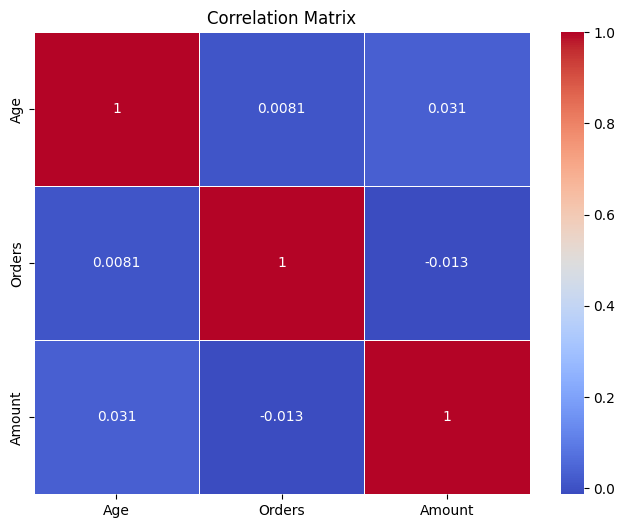

In [27]:
# Create a heatmap to visualize the correlation matrix

correlation_matrix = df[['Age', 'Orders', 'Amount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **Inference :**

**1."Age" and "Amount" have a positive correlation of 0.031, indicating a weak positive relationship. As age increases, the amount spent tends to increase slightly.**

**2."Orders" and "Amount" have a negative correlation of -0.013, suggesting a weak negative relationship. As the number of orders increases, the amount spent tends to decrease slightly.**

**3."Age" and "Orders" have a correlation of 0.008, indicating a very weak positive relationship.** 

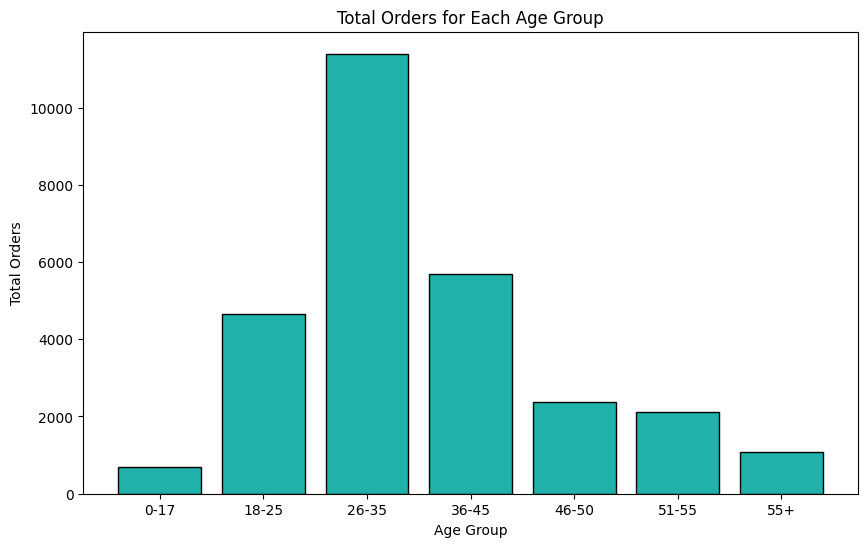

In [34]:
# Bar Graph: Visualize the total orders for each age group

plt.figure(figsize=(10, 6))

# Calculate the total orders for each age group
total_orders_by_age_group = df.groupby('Age Group')['Orders'].sum()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_orders_by_age_group.index, total_orders_by_age_group,color='lightseagreen',edgecolor='black')

# Add title and axis labels for clarity
plt.title('Total Orders for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Orders')

# Show the plot
plt.show()

## **Inference :**

**1.From the above bar chart  age group 26-35 are placed highest orders than other age group.**

**2.18-25 and 36-45 age group ordered and shows good interest in a better way.**

**3. 0-17  are the starting age group and age group 51-55 they are not less , also not more interested to order quality products as we can see from the graph.**

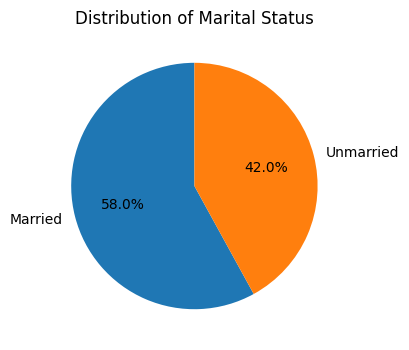

In [39]:
# Pie Chart: Visualize the distribution of Marital Status

marital_status_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.show()

## **Inference :**

**In our dataset, 58% are married individuals. This suggests that, in terms of buying product, married people contribute significantly more compared to unmarried individuals (42%).**

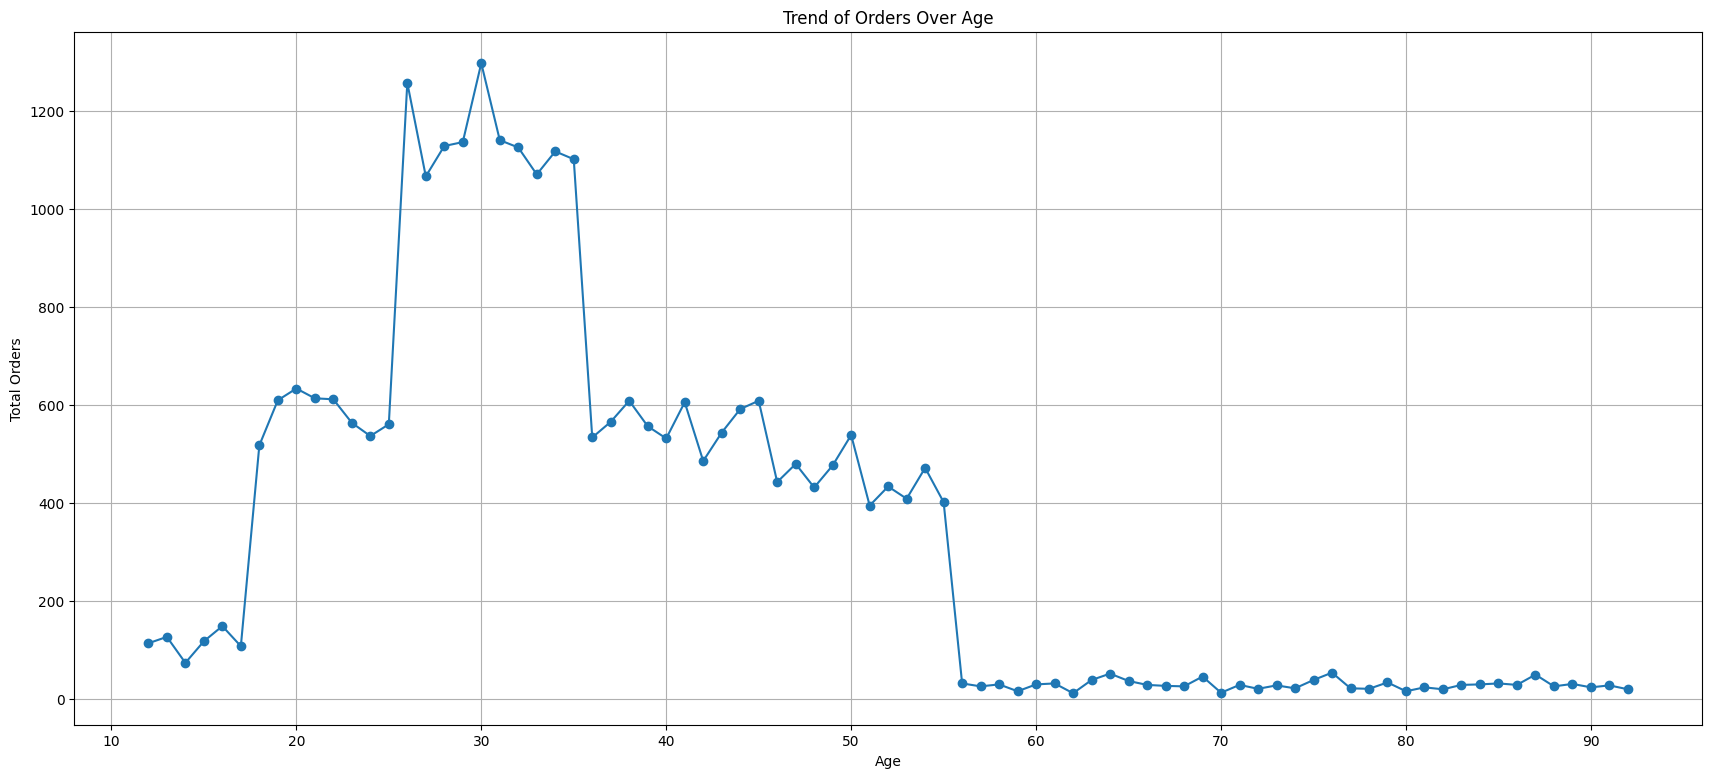

In [53]:
# Line Graph: Visualize the trend of Orders over Age

plt.figure(figsize=(21, 9))
plt.plot(df.groupby('Age')['Orders'].sum(), marker='o')
plt.title('Trend of Orders Over Age')
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

## **Inference :**

**1.From the above line chart we can see that orders is increasing from age 20 to 30.**   

**2.Orders are rising and falling from age 40-50 if we analize the line chart we can see that.**                                                           

**3.Age group between 60-90 are not much interested to buying products so the orders are decreasing for that age group and also selling is decreasing proportionally.**

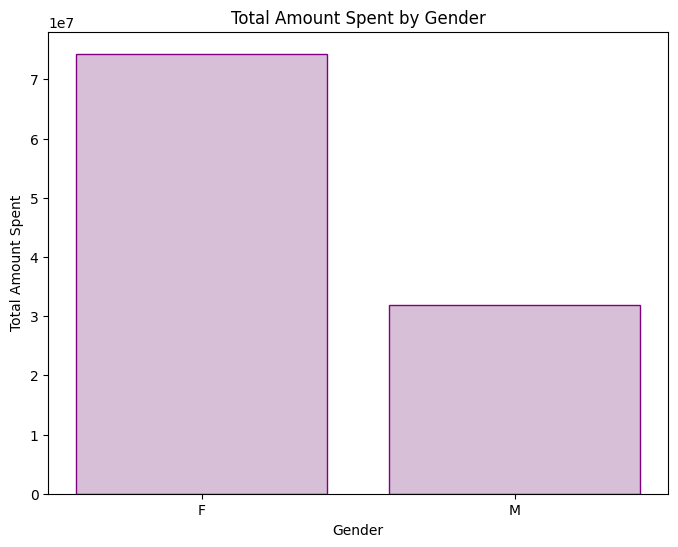

In [60]:
# Bar Graph: Visualize the total amount spent gender-wise 
plt.figure(figsize=(8, 6))

# Calculate the total amount spent for each gender
total_amount_by_gender = df.groupby('Gender')['Amount'].sum()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_amount_by_gender.index, total_amount_by_gender,color='thistle',edgecolor='purple')

# Add title and axis labels for clarity
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')

# Show the plot
plt.show()

 ## **Inference :**
 
 **The analysis of total amount spent gender-wise reveals that a significant majority of buyers are females, surpassing the number of male buyers.**
 

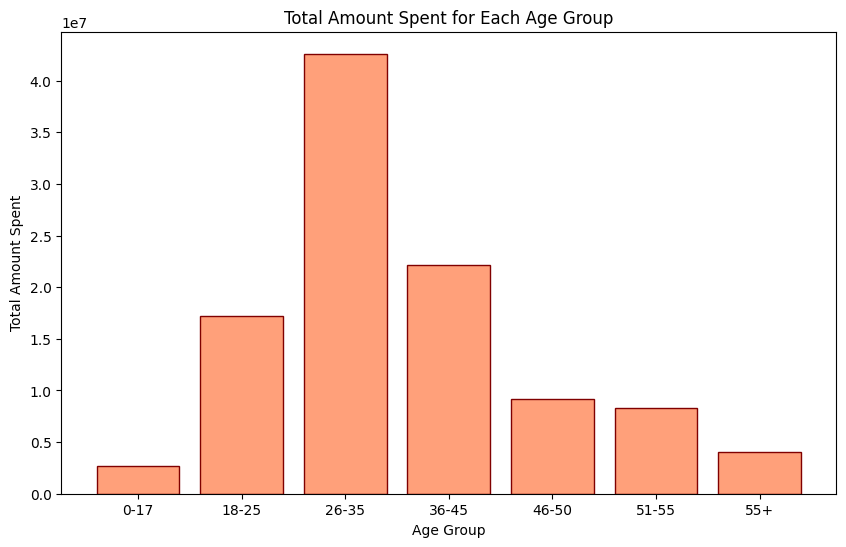

In [67]:
# Bar Graph: Visualize the total amount spent Age Group wise 
plt.figure(figsize=(10, 6))

# Calculate the total amount spent for each age group
total_amount_by_age_group = df.groupby('Age Group')['Amount'].sum()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_amount_by_age_group.index, total_amount_by_age_group, color='lightsalmon',edgecolor='maroon')

# Add title and axis labels for clarity
plt.title('Total Amount Spent for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')

# Show the plot
plt.show()

## **Inference :**

**1.From above graph we can see that most of the buyers are of age group between 26-35.**

**2.From starting age 0-17 age group are shows less interest in buying products.**

<Figure size 1200x600 with 0 Axes>

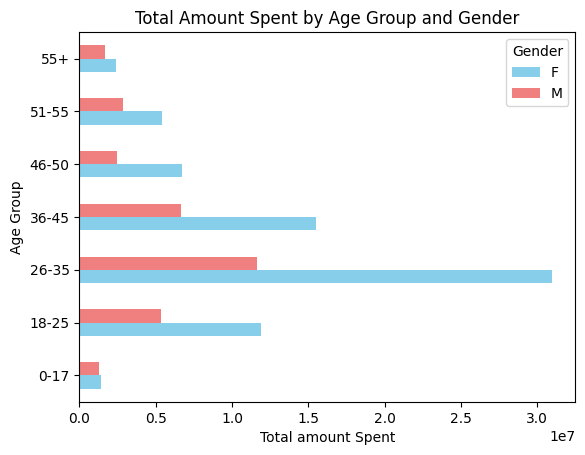

In [74]:
# Bar Graph: Visualize the total Amount spent for each Age Group and Gender 

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Calculate the total amount spent for each age group and gender
total_amount_by_age_gender = df.groupby(['Age Group', 'Gender'])['Amount'].sum().unstack()

# Use Matplotlib's bar function to create a grouped bar graph
total_amount_by_age_gender.plot(kind='barh',color=['skyblue', 'lightcoral'])

# Add title and axis labels for clarity
plt.title('Total Amount Spent by Age Group and Gender')
plt.xlabel('Total amount Spent')
plt.ylabel('Age Group')

# Show the plot
plt.show()

## **Inference:**

**1.From above horizontal bar graph we can see that most of the buyers are of age group between 26-35 and they are females.**

 **2.Female buyers are more actively involved in buying products & spend much amount money than male buyers.**

**3.36-45 & 18-25 age group are both consistently demonstrate a strong affinity for acquiring quality products.**

**4.Age between 0-17 male female both buyers spent very low amount for buying products.**

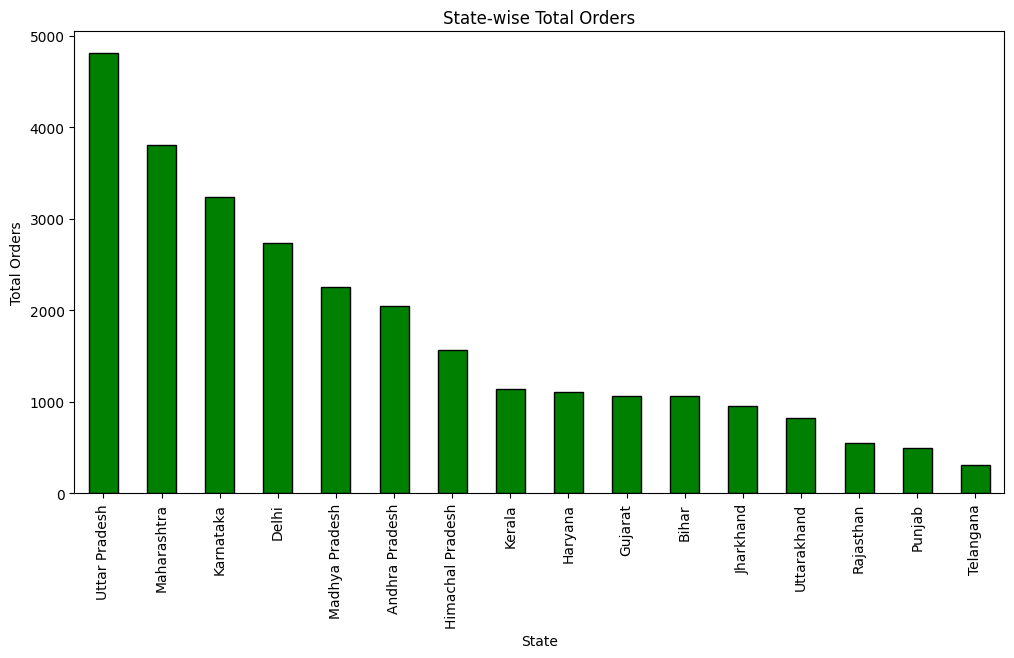

In [81]:
# Group by state and calculate total orders per state
statewise_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False)

# Plotting the state-wise orders
plt.figure(figsize=(12, 6))
statewise_orders.plot(kind='bar', color='green',edgecolor='black')
plt.title('State-wise Total Orders')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.show()

## **Inference:**

***1.The above bar chart showing that orders came from state Uttar Pradesh in a large way so the bar is high here.***

***2.Very lower orders came from Jharkhand,Uttarakhand,Rajasthan,Punjab,Telengana states.***

***3.Karnataka,Delhi,Madhya Pradesh and Andhra Prdesh are the states where orders are placed in a good manner.***

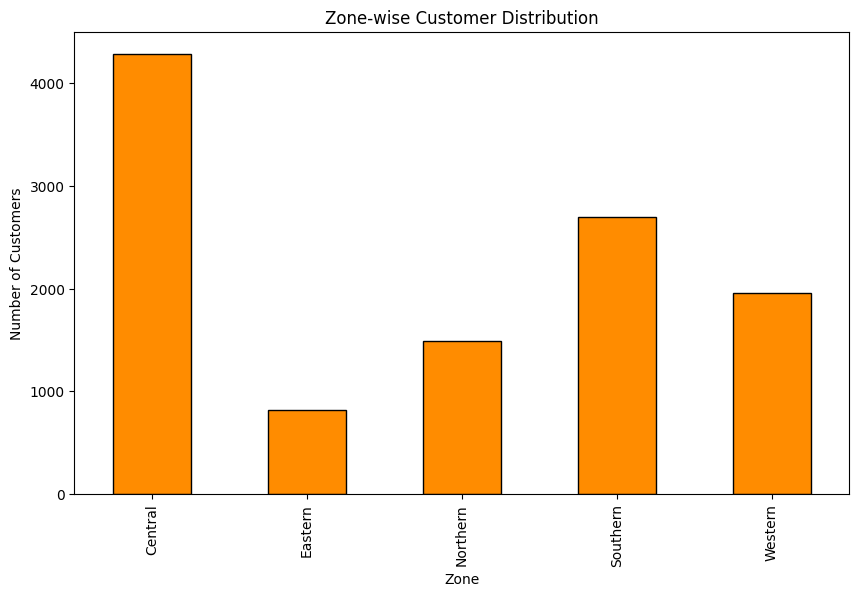

In [87]:
# Create a bar chart for zone-wise customer distribution
plt.figure(figsize=(10, 6))

# Count the number of customers in each zone and plot a bar chart
df['Zone'].value_counts().sort_index().plot(kind='bar', color='darkorange', edgecolor='black')

# Customize the chart title and labels
plt.title('Zone-wise Customer Distribution')
plt.xlabel('Zone')
plt.ylabel('Number of Customers')

# Display the chart
plt.show()

## **Inference :**

**1.Central zone and southern zone have the highest number of customers.**

**2.Northern and western zone have lesser number of customers.**

**3.Eastern zone has the lowest number of customers.**

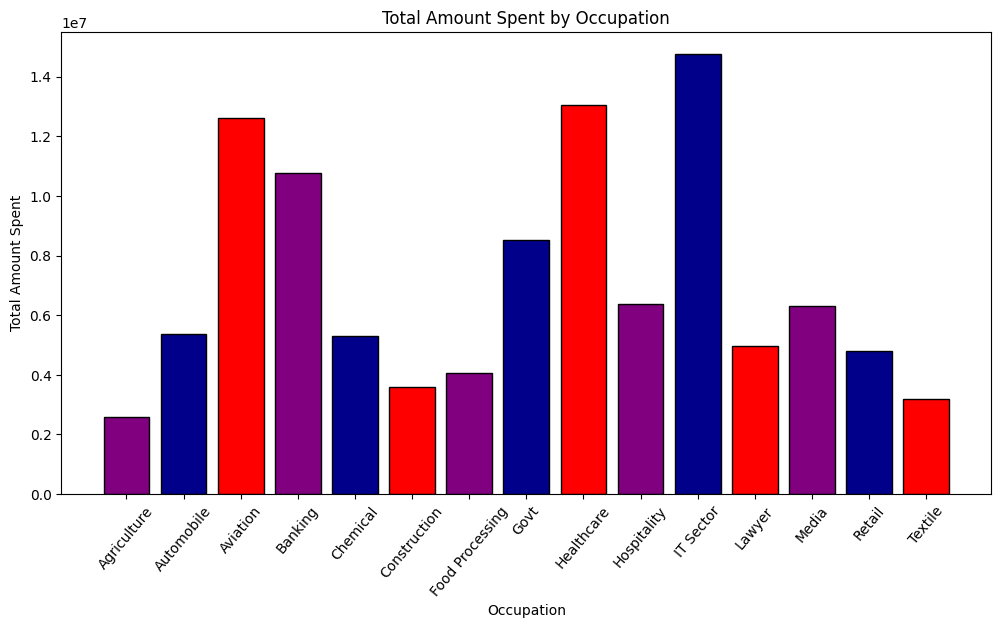

In [95]:
# Bar Graph: Visualize the total Amount spent for each Occupation 

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Calculate the total amount spent for each occupation
total_amount_by_occupation = df.groupby('Occupation')['Amount'].sum()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_amount_by_occupation.index, total_amount_by_occupation, color=['purple','darkblue','red'],edgecolor='black')

# Add title and axis labels for clarity
plt.title('Total Amount Spent by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Amount Spent')

# Rotate occupation labels for better visibility
plt.xticks(rotation=50)

# Show the plot
plt.show()

## **Inference:**

**From the above graph we can see the most of the buyers are working in IT, Aviation and Healthcare sector.**

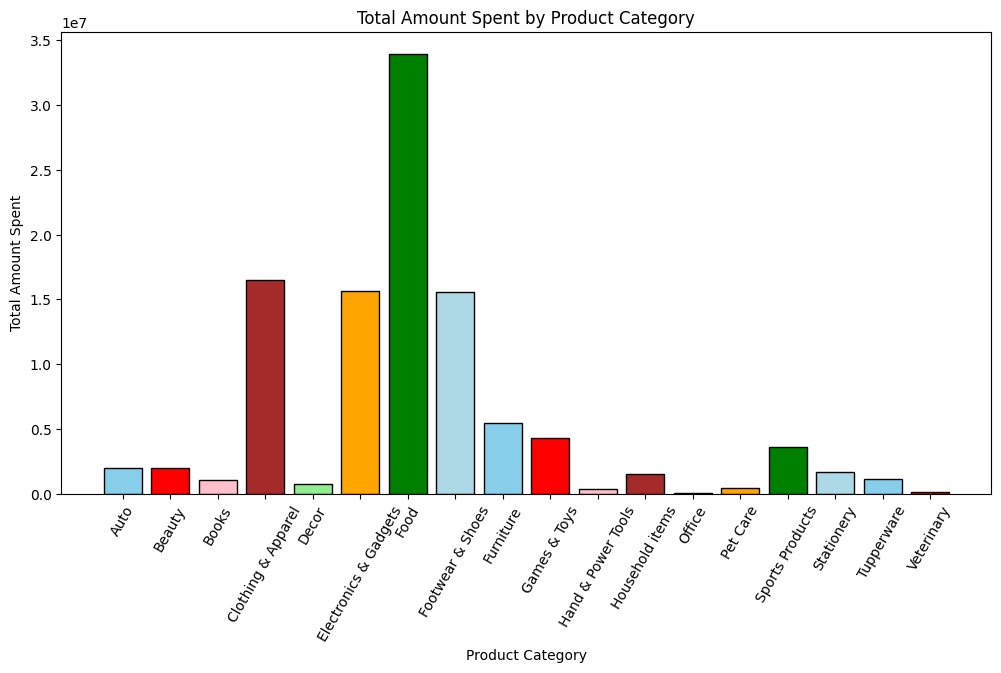

In [103]:
# Bar Graph: Visualize the total Amount spent for each Product Category 

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Calculate the total amount spent for each product category
total_amount_by_category = df.groupby('Product_Category')['Amount'].sum()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_amount_by_category.index, total_amount_by_category, color=['skyblue','red','pink','brown','lightgreen','orange','green','lightblue'],edgecolor='black')

# Add title and axis labels for clarity
plt.title('Total Amount Spent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')

# Rotate product category labels for better visibility
plt.xticks(rotation=60)

# Show the plot
plt.show()

## **Inference:**

**1.From above graphs we can see that most of the sold products are from Food,Footwear and Electronic & gadgets.**

**2.Books,Decor,Games&Toys,Pet care veterinary are the lowest sold products as we can see from the above graph represntation.**

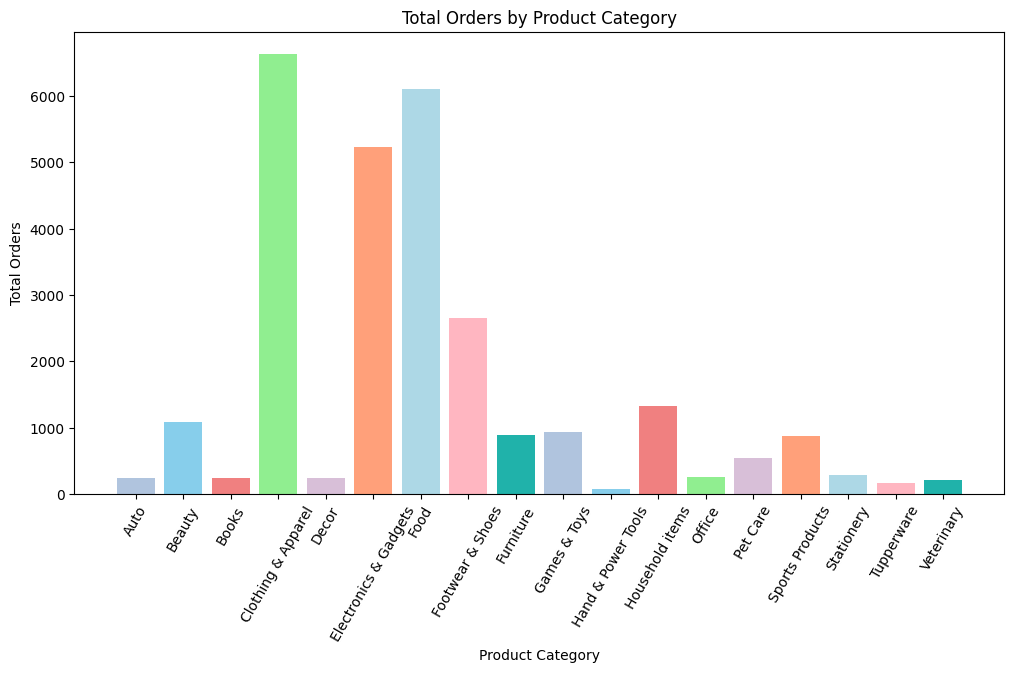

In [111]:
# Bar Graph: Visualize the total Orders for each Product Category 

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Calculate the total number of orders for each product category
total_orders_by_category = df.groupby('Product_Category')['Orders'].sum()

# Use Matplotlib's bar function to create a bar graph
plt.bar(total_orders_by_category.index, total_orders_by_category, color= ['lightsteelblue','skyblue', 'lightcoral', 'lightgreen','thistle', 'lightsalmon', 'lightblue', 'lightpink','lightseagreen'])

# Add title and axis labels for clarity
plt.title('Total Orders by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')

# Rotate product category labels for better visibility
plt.xticks(rotation=60)

# Show the plot
plt.show()

## **Inference :**

**The analysis of product categories and spending patterns reveals an interesting trend. While the majority of orders are placed in the Clothing category but the highest amount spent is observed in the Food category. This disparity suggests that, although Clothing products attract a higher volume of orders along side, Food products command a higher average amount spending per transaction.** 

## <u>**_Conclusion</u> :_**

**Based on the analysis, it is observed that the age group 26-35, particularly married women in the states of Uttar Pradesh (UP), Maharashtra, and Karnataka, with occupations in IT, Healthcare, and Aviation, are more inclined to make purchases across various product categories. Specifically, products from the food, clothing, and electronic categories .**

**This information is like a treasure for businesses.The above analysis should help us to understand and explore further on the reasons
behind the popularity and poor sales of the products. With this foresight a  company can make decisions whether to continue production/sales of a specific product for future . It also says that if we focus our marketing on older age groups, they're likely to spend more. Also, if we encourage people to buy more frequently, it could boost our overall earnings. So, for promotions, the products we offer, and how we interact with customers, knowing these things helps us make smarter decisions to grow our business.**